In [4]:
import pandas as pd
import numpy as np
#import keras
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv('/Users/amirtemimi/Downloads/15minute_data_newyork/15minute_data_newyork.csv')

In [8]:
data

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,4550,2019-06-24 14:45:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,120.625,120.750
1,4550,2019-06-24 14:30:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,120.456,120.558
2,4550,2019-06-24 14:15:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,120.513,120.629
3,4550,2019-06-24 14:00:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,121.567,121.638
4,558,2019-06-24 14:45:00-05,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441594,3996,2019-10-31 22:00:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.001,0.867,NaN,0.019,NaN,120.205,120.188
441595,914,2019-10-31 23:45:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.271,123.032
441596,914,2019-10-31 23:30:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.405,122.970
441597,914,2019-10-31 23:15:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.532,123.104


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dataid                15422 non-null  int64  
 1   local_15min           15422 non-null  object 
 2   air1                  6882 non-null   float64
 3   air2                  1246 non-null   float64
 4   air3                  0 non-null      float64
 5   airwindowunit1        626 non-null    float64
 6   aquarium1             0 non-null      float64
 7   bathroom1             2298 non-null   float64
 8   bathroom2             0 non-null      float64
 9   bedroom1              2505 non-null   float64
 10  bedroom2              0 non-null      float64
 11  bedroom3              0 non-null      float64
 12  bedroom4              0 non-null      float64
 13  bedroom5              0 non-null      float64
 14  battery1              0 non-null      float64
 15  car1               

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
dataid,15422.0,3110.997471,2268.827616,27.000,1222.000,3000.000,4550.000,9053.000
air1,6882.0,0.303982,0.630232,-0.002,0.000,0.006,0.066,2.384
air2,1246.0,0.013083,0.019416,-0.002,0.000,0.006,0.022,0.061
air3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airwindowunit1,626.0,0.000738,0.000749,0.000,0.000,0.001,0.001,0.008
...,...,...,...,...,...,...,...,...
waterheater2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wellpump1,5420.0,0.023982,0.084509,-0.011,0.000,0.000,0.002,1.111
winecooler1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
leg1v,15422.0,121.367043,4.937144,0.108,120.546,121.841,122.772,126.373


In [146]:
data.shape

(15422, 79)

In [147]:
data.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [148]:
#See if we have NAN values 
#if it displays False means there is no NAN values
#If it displays True, means there is a NAN values
data. isna(). any()

dataid          False
local_15min     False
air1             True
air2             True
air3             True
                ...  
waterheater2     True
wellpump1        True
winecooler1      True
leg1v           False
leg2v           False
Length: 79, dtype: bool

In [10]:
data.dataid.value_counts()

2318    17664
914     17664
5587    17664
1222    17664
4550    17664
5058    17664
3517    17664
3000    17664
4283    17664
950     17664
3488    17664
3996    17664
142     17664
1417    17664
387     17664
3700    17664
5997    17664
5982    17664
9053    17664
2358    17664
2096    17664
558     17664
5679    17664
1240    17664
27      17663
Name: dataid, dtype: int64

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dataid                15422 non-null  int64  
 1   local_15min           15422 non-null  object 
 2   air1                  6882 non-null   float64
 3   air2                  1246 non-null   float64
 4   air3                  0 non-null      float64
 5   airwindowunit1        626 non-null    float64
 6   aquarium1             0 non-null      float64
 7   bathroom1             2298 non-null   float64
 8   bathroom2             0 non-null      float64
 9   bedroom1              2505 non-null   float64
 10  bedroom2              0 non-null      float64
 11  bedroom3              0 non-null      float64
 12  bedroom4              0 non-null      float64
 13  bedroom5              0 non-null      float64
 14  battery1              0 non-null      float64
 15  car1               

# **Delete the NAN columns**

In [150]:
del data['air3']
del data ['aquarium1']
del data ['bathroom2']
del data ['bedroom3']
del data ['bedroom4']
del data ['bedroom5']
del data ['battery1']
del data ['car2']
del data ['diningroom2']
del data ['dryg1']
del data ['garage2']
del data ['icemaker1']
del data ['kitchen2']
del data ['lights_plugs5']
del data ['lights_plugs6']
del data ['livingroom2']
del data ['outsidelights_plugs1']
del data ['outsidelights_plugs2']
del data ['oven2']
del data ['pool1']
del data ['pool2']
del data ['poollight1']
del data ['poolpump1']
del data ['refrigerator2']
del data ['security1']
del data ['shed1']
del data ['sprinkler1']
del data ['waterheater2']
del data ['winecooler1']
del data ['bedroom2']


In [151]:
data

,dataid,local_15min,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,circpump1,clotheswasher1,...,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v,leg2v
0,4550,2019-06-24 14:45:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120.625,120.750
1,4550,2019-06-24 14:30:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120.456,120.558
2,4550,2019-06-24 14:15:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120.513,120.629
3,4550,2019-06-24 14:00:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.567,121.638
4,558,2019-06-24 14:45:00-05,0.081,NaN,NaN,NaN,NaN,NaN,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,3517,2019-07-01 00:15:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,120.624,119.705
15418,3517,2019-07-01 00:00:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,120.482,119.430
15419,3000,2019-07-01 00:00:00-05,0.006,NaN,NaN,NaN,0.005,0.002,NaN,0.001,...,NaN,0.000,-0.002,NaN,NaN,NaN,NaN,NaN,122.600,122.690
15420,4283,2019-07-01 00:45:00-05,NaN,NaN,0.0,NaN,NaN,NaN,0.001,0.000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,124.330,123.186


In [152]:
#See if we have NAN values 
#if it displays False means there is no NAN values
#If it displays True, means there is a NAN values
data. isna(). any()

dataid                 False
local_15min            False
air1                    True
air2                    True
airwindowunit1          True
bathroom1               True
bedroom1                True
car1                    True
circpump1               True
clotheswasher1          True
clotheswasher_dryg1     True
diningroom1             True
dishwasher1             True
disposal1               True
drye1                   True
freezer1                True
furnace1                True
furnace2                True
garage1                 True
grid                   False
heater1                 True
heater2                 True
heater3                 True
housefan1               True
jacuzzi1                True
kitchen1                True
kitchenapp1             True
kitchenapp2             True
lights_plugs1           True
lights_plugs2           True
lights_plugs3           True
lights_plugs4           True
livingroom1             True
microwave1              True
office1       

In [153]:
data['grid']

0        0.110
1        0.169
2        0.122
3        0.159
4        0.442
         ...  
15417    1.492
15418    1.238
15419    0.487
15420    0.875
15421    0.783
Name: grid, Length: 15422, dtype: float64

In [154]:
data['grid'].describe()

count    15422.000000
mean         0.224985
std          2.124631
min        -15.410000
25%          0.148000
50%          0.457000
75%          0.915000
max         13.275000
Name: grid, dtype: float64

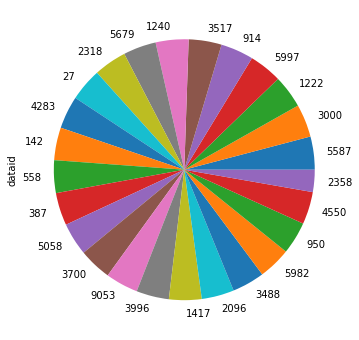

In [155]:
data['dataid'].value_counts().plot(kind='pie', figsize=(10,6))

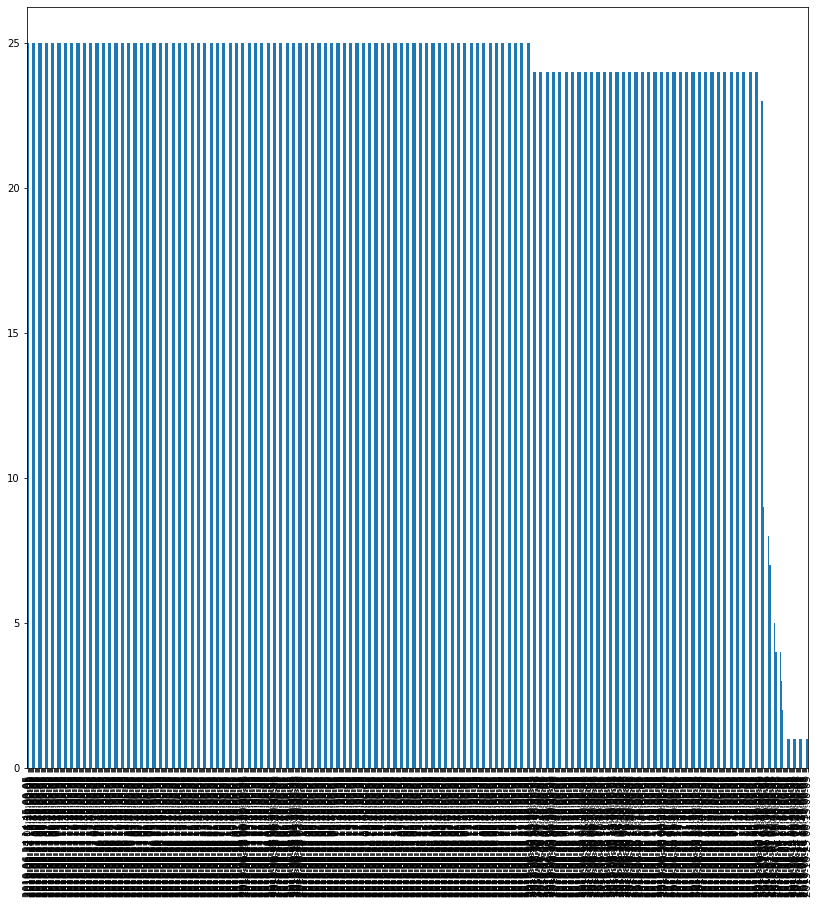

In [156]:
ax = data['local_15min'].value_counts().plot(kind='bar', figsize=(14,14))

In [157]:
import seaborn as sns

Text(0.5, 1.0, 'Grid distributions per seconds')

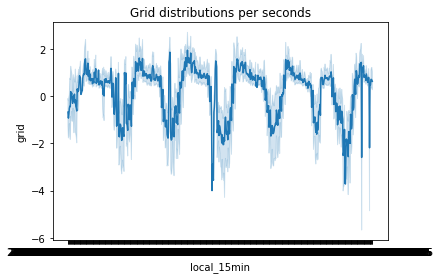

In [158]:
sns.lineplot(x="local_15min",  y = 'grid',data=data ).set_title("Grid distributions per seconds")

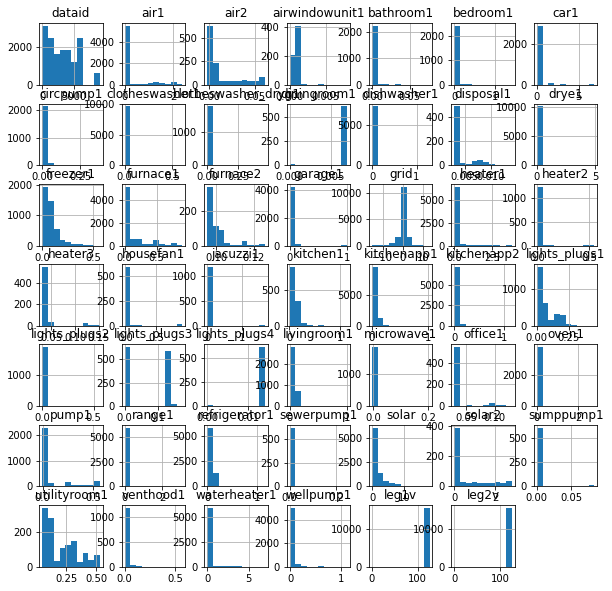

In [159]:
#histogram of the data set

data.hist(figsize=(10,10))
plt.show()

In [160]:
data

,dataid,local_15min,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,circpump1,clotheswasher1,...,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v,leg2v
0,4550,2019-06-24 14:45:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120.625,120.750
1,4550,2019-06-24 14:30:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120.456,120.558
2,4550,2019-06-24 14:15:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120.513,120.629
3,4550,2019-06-24 14:00:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.567,121.638
4,558,2019-06-24 14:45:00-05,0.081,NaN,NaN,NaN,NaN,NaN,NaN,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,3517,2019-07-01 00:15:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,120.624,119.705
15418,3517,2019-07-01 00:00:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,120.482,119.430
15419,3000,2019-07-01 00:00:00-05,0.006,NaN,NaN,NaN,0.005,0.002,NaN,0.001,...,NaN,0.000,-0.002,NaN,NaN,NaN,NaN,NaN,122.600,122.690
15420,4283,2019-07-01 00:45:00-05,NaN,NaN,0.0,NaN,NaN,NaN,0.001,0.000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,124.330,123.186


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dataid               15422 non-null  int64  
 1   local_15min          15422 non-null  object 
 2   air1                 6882 non-null   float64
 3   air2                 1246 non-null   float64
 4   airwindowunit1       626 non-null    float64
 5   bathroom1            2298 non-null   float64
 6   bedroom1             2505 non-null   float64
 7   car1                 3135 non-null   float64
 8   circpump1            2294 non-null   float64
 9   clotheswasher1       9800 non-null   float64
 10  clotheswasher_dryg1  1878 non-null   float64
 11  diningroom1          628 non-null    float64
 12  dishwasher1          7498 non-null   float64
 13  disposal1            632 non-null    float64
 14  drye1                10424 non-null  float64
 15  freezer1             4382 non-null  

In [162]:
data["dataid"] = data["dataid"].astype('category')
data["local_15min"] = data["local_15min"].astype('category')
data["air1"] = data["air1"].astype('category')
data["air2"] = data["air2"].astype('category')
data["bathroom1"] = data["bathroom1"].astype('category')
data["bedroom1"] = data["bedroom1"].astype('category')
data["car1"] = data["car1"].astype('category')

data["grid"] = data["grid"].astype('category')


data["circpump1"] = data["circpump1"].astype('category')
data["clotheswasher1"] = data["clotheswasher1"].astype('category')



data["clotheswasher_dryg1"] = data["clotheswasher_dryg1"].astype('category')
data["diningroom1"] = data["diningroom1"].astype('category')
data["dishwasher1"] = data["dishwasher1"].astype('category')
data["disposal1"] = data["disposal1"].astype('category')

data["drye1"] = data["drye1"].astype('category')
data["freezer1"] = data["freezer1"].astype('category')
data["furnace1"] = data["furnace1"].astype('category')
data["furnace2"] = data["furnace2"].astype('category')
data["garage1"] = data["garage1"].astype('category')
data["heater1"] = data["heater1"].astype('category')
data["heater2"] = data["heater2"].astype('category')
data["heater3"] = data["heater3"].astype('category')
data["housefan1"] = data["housefan1"].astype('category')
data["jacuzzi1"] = data["jacuzzi1"].astype('category')
data["kitchen1"] = data["kitchen1"].astype('category')


data["kitchenapp1"] = data["kitchenapp1"].astype('category')
data["kitchenapp2"] = data["kitchenapp2"].astype('category')
data["lights_plugs1"] = data["lights_plugs1"].astype('category')
data["lights_plugs2"] = data["lights_plugs2"].astype('category')
data["lights_plugs3"] = data["lights_plugs3"].astype('category')
data["lights_plugs4"] = data["lights_plugs4"].astype('category')
data["livingroom1"] = data["livingroom1"].astype('category')
data["microwave1"] = data["microwave1"].astype('category')


data["office1"] = data["office1"].astype('category')
data["oven1"] = data["oven1"].astype('category')
data["pump1"] = data["pump1"].astype('category')
data["range1"] = data["range1"].astype('category')
data["refrigerator1"] = data["refrigerator1"].astype('category')
data["sewerpump1"] = data["sewerpump1"].astype('category')


data["solar"] = data["solar"].astype('category')
data["solar2"] = data["solar2"].astype('category')
data["sumppump1"] = data["sumppump1"].astype('category')
data["utilityroom1"] = data["utilityroom1"].astype('category')
data["venthood1"] = data["venthood1"].astype('category')
data["waterheater1"] = data["waterheater1"].astype('category')
data["wellpump1"] = data["wellpump1"].astype('category')
data["leg1v"] = data["leg1v"].astype('category')
data["leg2v"] = data["leg2v"].astype('category')


In [163]:
data["dataid_num"] = data["dataid"].cat.codes
data["local_15min_num"] = data["local_15min"].cat.codes
data["air1_num"] = data["air1"].cat.codes
data["air2_num"] =data["air2"].cat.codes
data["bathroom1_num"] =data["bathroom1"].cat.codes
data["bedroom1_num"] =data["bedroom1"].cat.codes


data["car1_num"] =data["car1"].cat.codes
data["grid_num"] =data["grid"].cat.codes
data["circpump1_num"] =data["circpump1"].cat.codes
data["clotheswasher1_num"] =data["clotheswasher1"].cat.codes
data["clotheswasher_dryg1_num"] =data["clotheswasher_dryg1"].cat.codes
data["diningroom1_num"] =data["diningroom1"].cat.codes
data["dishwasher1_num"] =data["dishwasher1"].cat.codes
data["disposal1_num"] =data["disposal1"].cat.codes


data["drye1_num"] =data["drye1"].cat.codes
data["freezer1_num"] =data["freezer1"].cat.codes
data["furnace1_num"] =data["furnace1"].cat.codes
data["furnace2_num"] =data["furnace2"].cat.codes
data["garage1_num"] =data["garage1"].cat.codes
data["heater1_num"] =data["heater1"].cat.codes
data["heater2_num"] =data["heater2"].cat.codes
data["heater3_num"] =data["heater3"].cat.codes



data["housefan1_num"] =data["housefan1"].cat.codes
data["jacuzzi1_num"] =data["jacuzzi1"].cat.codes
data["kitchen1_num"] =data["kitchen1"].cat.codes
data["kitchenapp1_num"] =data["kitchenapp1"].cat.codes
data["kitchenapp2_num"] =data["kitchenapp2"].cat.codes
data["lights_plugs1_num"] =data["lights_plugs1"].cat.codes


data["lights_plugs2_num"] =data["lights_plugs2"].cat.codes
data["lights_plugs3_num"] =data["lights_plugs3"].cat.codes
data["lights_plugs4_num"] =data["lights_plugs4"].cat.codes
data["livingroom1_num"] =data["livingroom1"].cat.codes
data["microwave1_num"] =data["microwave1"].cat.codes
data["office1_num"] =data["office1"].cat.codes


data["oven1_num"] =data["oven1"].cat.codes
data["pump1_num"] =data["pump1"].cat.codes
data["range1_num"] =data["range1"].cat.codes
data["refrigerator1_num"] =data["refrigerator1"].cat.codes


data["sewerpump1_num"] =data["sewerpump1"].cat.codes
data["solar_num"] =data["solar"].cat.codes
data["solar2_num"] =data["solar2"].cat.codes
data["sumppump1_num"] =data["sumppump1"].cat.codes
data["utilityroom1_num"] =data["utilityroom1"].cat.codes
data["venthood1_num"] =data["venthood1"].cat.codes
data["waterheater1_num"] =data["waterheater1"].cat.codes
data["wellpump1_num"] =data["wellpump1"].cat.codes
data["leg1v_num"] =data["leg1v"].cat.codes

data["leg2v_num"] =data["leg2v"].cat.codes


In [164]:
df=data[['dataid_num','local_15min_num','air1_num','air2_num','bathroom1_num', 'bedroom1_num','car1_num', 'grid_num', 'circpump1_num', 'clotheswasher1_num', 'diningroom1_num' , 'dishwasher1_num' , 'disposal1_num' , 'drye1_num' , 'freezer1_num' , 'furnace1_num', 'furnace2_num', 'garage1_num', 'heater1_num' , 'heater2_num' , 'heater3_num' , 'housefan1_num' , 'jacuzzi1_num' , 'kitchen1_num' , 'kitchenapp1_num' , 'kitchenapp2_num' , 'lights_plugs1_num' , 'lights_plugs2_num' , 'lights_plugs3_num' , 'lights_plugs4_num' , 'livingroom1_num' , 'microwave1_num' , 'office1_num' , 'oven1_num' , 'pump1_num' , 'range1_num' , 'refrigerator1_num' , 'sewerpump1_num' , 'solar_num' , 'solar_num'  , 'solar2_num'  , 'sumppump1_num'  , 'utilityroom1_num'  , 'venthood1_num'  , 'waterheater1_num' , 'wellpump1_num'  , 'leg1v_num'  , 'leg2v_num' ]].copy()

In [165]:
cols_to_scale = ['dataid_num','local_15min_num','air1_num','air2_num','bathroom1_num', 'bedroom1_num','car1_num', 'grid_num', 'circpump1_num', 'clotheswasher1_num', 'diningroom1_num' , 'dishwasher1_num' , 'disposal1_num' , 'drye1_num' , 'freezer1_num' , 'furnace1_num', 'furnace2_num', 'garage1_num', 'heater1_num' , 'heater2_num' , 'heater3_num' , 'housefan1_num' , 'jacuzzi1_num' , 'kitchen1_num' , 'kitchenapp1_num' , 'kitchenapp2_num' , 'lights_plugs1_num' , 'lights_plugs2_num' , 'lights_plugs3_num' , 'lights_plugs4_num' , 'livingroom1_num' , 'microwave1_num' , 'office1_num' , 'oven1_num' , 'pump1_num' , 'range1_num' , 'refrigerator1_num' , 'sewerpump1_num' , 'solar_num' , 'solar_num'  , 'solar2_num'  , 'sumppump1_num'  , 'utilityroom1_num'  , 'venthood1_num'  , 'waterheater1_num' , 'wellpump1_num'  , 'leg1v_num'  , 'leg2v_num' ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [166]:
df

,dataid_num,local_15min_num,air1_num,air2_num,bathroom1_num,bedroom1_num,car1_num,grid_num,circpump1_num,clotheswasher1_num,...,solar_num,solar_num,solar2_num,sumppump1_num,utilityroom1_num,venthood1_num,waterheater1_num,wellpump1_num,leg1v_num,leg2v_num
0,0.750000,0.010654,0.000000,0.0,0.0,0.000000,0.000000,0.466237,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.387923,0.411726
1,0.750000,0.009132,0.000000,0.0,0.0,0.000000,0.000000,0.477093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.363800,0.382493
2,0.750000,0.007610,0.000000,0.0,0.0,0.000000,0.000000,0.468445,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.371841,0.393004
3,0.750000,0.006088,0.000000,0.0,0.0,0.000000,0.000000,0.475253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.534132,0.550994
4,0.125000,0.010654,0.072278,0.0,0.0,0.000000,0.000000,0.527323,0.000000,0.014423,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.353791,0.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,0.583333,0.945205,0.002745,0.0,0.0,0.000000,0.000000,0.711684,0.000000,0.000000,...,0.013930,0.013930,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.387758,0.262605
15418,0.583333,0.943683,0.002745,0.0,0.0,0.000000,0.000000,0.671573,0.000000,0.000000,...,0.013930,0.013930,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.367246,0.229923
15419,0.500000,0.943683,0.008234,0.0,0.0,0.045685,0.018987,0.535603,0.000000,0.014423,...,0.013634,0.013634,0.003067,0.000000,0.0,0.0,0.0,0.000000,0.700033,0.721629
15420,0.708333,0.948250,0.000000,0.0,0.0,0.000000,0.000000,0.606992,0.026316,0.009615,...,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.935510,0.801774


# **Exploratory Analysis**

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

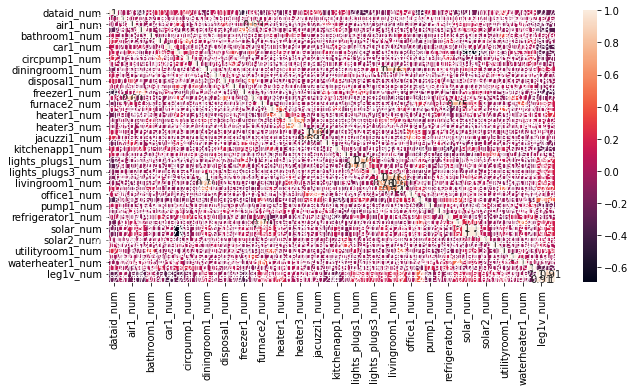

In [168]:
# checking for heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [169]:
#correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.corr(method ='pearson')

,dataid_num,local_15min_num,air1_num,air2_num,bathroom1_num,bedroom1_num,car1_num,grid_num,circpump1_num,clotheswasher1_num,...,solar_num,solar_num,solar2_num,sumppump1_num,utilityroom1_num,venthood1_num,waterheater1_num,wellpump1_num,leg1v_num,leg2v_num
dataid_num,1.000000,0.003288,-0.009632,-0.279277,0.106357,0.195818,0.124693,0.142062,0.211953,0.053309,...,-0.171945,-0.171945,-0.000285,0.092039,0.235262,0.026251,-0.038384,0.119866,-0.268695,-0.228276
local_15min_num,0.003288,1.000000,0.027282,0.005364,-0.017966,0.031944,-0.010138,0.002800,-0.055376,-0.013438,...,0.021026,0.021026,0.000531,-0.005579,0.016372,-0.004212,0.007390,0.023249,0.026031,0.011495
air1_num,-0.009632,0.027282,1.000000,-0.021887,-0.049366,-0.037453,0.021965,0.205859,-0.058720,0.019047,...,0.128446,0.128446,0.004733,-0.042356,-0.072695,0.016207,0.083285,-0.095064,-0.180216,-0.174672
air2_num,-0.279277,0.005364,-0.021887,1.000000,-0.034586,-0.037611,0.123546,-0.116972,-0.032561,-0.037376,...,0.131349,0.131349,-0.023896,-0.023487,-0.040310,-0.024316,0.062962,0.048940,-0.299312,-0.300402
bathroom1_num,0.106357,-0.017966,-0.049366,-0.034586,1.000000,-0.042348,-0.040142,-0.005996,0.005478,-0.006847,...,-0.015985,-0.015985,-0.026906,-0.026445,0.331600,0.039229,0.054159,0.045417,0.036126,0.059632
bedroom1_num,0.195818,0.031944,-0.037453,-0.037611,-0.042348,1.000000,-0.002995,0.159671,0.389903,0.077563,...,-0.069930,-0.069930,0.063453,-0.028758,-0.049356,-0.029773,-0.069383,0.183600,-0.180652,-0.069638
car1_num,0.124693,-0.010138,0.021965,0.123546,-0.040142,-0.002995,1.000000,0.134895,-0.015856,0.005667,...,0.026955,0.026955,0.036020,-0.027260,-0.046786,-0.028222,0.049690,0.063261,-0.296187,-0.309536
grid_num,0.142062,0.002800,0.205859,-0.116972,-0.005996,0.159671,0.134895,1.000000,0.156730,0.136041,...,-0.691442,-0.691442,-0.188122,0.082762,-0.121778,0.054541,0.111711,0.156395,-0.254235,-0.217424
circpump1_num,0.211953,-0.055376,-0.058720,-0.032561,0.005478,0.389903,-0.015856,0.156730,1.000000,0.078044,...,-0.102988,-0.102988,-0.025330,0.033480,-0.042729,-0.025775,-0.052993,0.208276,-0.167252,-0.108950
clotheswasher1_num,0.053309,-0.013438,0.019047,-0.037376,-0.006847,0.077563,0.005667,0.136041,0.078044,1.000000,...,-0.043121,-0.043121,0.028816,0.107346,-0.021105,0.021506,0.029760,0.140793,-0.049881,-0.068788


# **Models**

In [172]:
#import Libraries for all the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics


from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

In [173]:
df

,dataid_num,local_15min_num,air1_num,air2_num,bathroom1_num,bedroom1_num,car1_num,grid_num,circpump1_num,clotheswasher1_num,...,solar_num,solar_num,solar2_num,sumppump1_num,utilityroom1_num,venthood1_num,waterheater1_num,wellpump1_num,leg1v_num,leg2v_num
0,0.750000,0.010654,0.000000,0.0,0.0,0.000000,0.000000,0.466237,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.387923,0.411726
1,0.750000,0.009132,0.000000,0.0,0.0,0.000000,0.000000,0.477093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.363800,0.382493
2,0.750000,0.007610,0.000000,0.0,0.0,0.000000,0.000000,0.468445,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.371841,0.393004
3,0.750000,0.006088,0.000000,0.0,0.0,0.000000,0.000000,0.475253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.534132,0.550994
4,0.125000,0.010654,0.072278,0.0,0.0,0.000000,0.000000,0.527323,0.000000,0.014423,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.353791,0.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,0.583333,0.945205,0.002745,0.0,0.0,0.000000,0.000000,0.711684,0.000000,0.000000,...,0.013930,0.013930,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.387758,0.262605
15418,0.583333,0.943683,0.002745,0.0,0.0,0.000000,0.000000,0.671573,0.000000,0.000000,...,0.013930,0.013930,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.367246,0.229923
15419,0.500000,0.943683,0.008234,0.0,0.0,0.045685,0.018987,0.535603,0.000000,0.014423,...,0.013634,0.013634,0.003067,0.000000,0.0,0.0,0.0,0.000000,0.700033,0.721629
15420,0.708333,0.948250,0.000000,0.0,0.0,0.000000,0.000000,0.606992,0.026316,0.009615,...,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.935510,0.801774


In [174]:
X_train = df.drop(['grid_num'], axis=1)
y_train = df[['grid_num']]
print(X_train.shape)
print(y_train.shape)

(15422, 47)
(15422, 1)


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [176]:
df

,dataid_num,local_15min_num,air1_num,air2_num,bathroom1_num,bedroom1_num,car1_num,grid_num,circpump1_num,clotheswasher1_num,...,solar_num,solar_num,solar2_num,sumppump1_num,utilityroom1_num,venthood1_num,waterheater1_num,wellpump1_num,leg1v_num,leg2v_num
0,0.750000,0.010654,0.000000,0.0,0.0,0.000000,0.000000,0.466237,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.387923,0.411726
1,0.750000,0.009132,0.000000,0.0,0.0,0.000000,0.000000,0.477093,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.363800,0.382493
2,0.750000,0.007610,0.000000,0.0,0.0,0.000000,0.000000,0.468445,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.371841,0.393004
3,0.750000,0.006088,0.000000,0.0,0.0,0.000000,0.000000,0.475253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.037618,0.534132,0.550994
4,0.125000,0.010654,0.072278,0.0,0.0,0.000000,0.000000,0.527323,0.000000,0.014423,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.353791,0.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,0.583333,0.945205,0.002745,0.0,0.0,0.000000,0.000000,0.711684,0.000000,0.000000,...,0.013930,0.013930,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.387758,0.262605
15418,0.583333,0.943683,0.002745,0.0,0.0,0.000000,0.000000,0.671573,0.000000,0.000000,...,0.013930,0.013930,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.367246,0.229923
15419,0.500000,0.943683,0.008234,0.0,0.0,0.045685,0.018987,0.535603,0.000000,0.014423,...,0.013634,0.013634,0.003067,0.000000,0.0,0.0,0.0,0.000000,0.700033,0.721629
15420,0.708333,0.948250,0.000000,0.0,0.0,0.000000,0.000000,0.606992,0.026316,0.009615,...,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.935510,0.801774


# **ANN**

In [177]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [178]:
callbacks= [
            
            EarlyStopping(monitor='accuracy', patience=20, verbose=1)
           ]

In [180]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 47,kernel_regularizer=regularizers.l2(0.1)))

# Adding the second hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.1)))

# Adding the third hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.1)))

# Adding the output layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.1)))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# Fitting the ANN to the Training set
result= classifier.fit(X_train, y_train, batch_size = 8, callbacks=callbacks, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
1543/1543 [==============================] - 5s 2ms/step - loss: 0.6926 - accuracy: 8.1057e-05 - val_loss: 0.6917 - val_accuracy: 0.0000e+00
Epoch 2/100
1543/1543 [==============================] - 3s 2ms/step - loss: 0.6916 - accuracy: 8.1057e-05 - val_loss: 0.6918 - val_accuracy: 0.0000e+00
Epoch 3/100
1543/1543 [==============================] - 3s 2ms/step - loss: 0.6916 - accuracy: 8.1057e-05 - val_loss: 0.6917 - val_accuracy: 0.0000e+00
Epoch 4/100
1543/1543 [==============================] - 3s 2ms/step - loss: 0.6916 - accuracy: 8.1057e-05 - val_loss: 0.6917 - val_accuracy: 0.0000e+00
Epoch 5/100
1543/1543 [==============================] - 3s 2ms/step - loss: 0.6916 - accuracy: 8.1057e-05 - val_loss: 0.6917 - val_accuracy: 0.0000e+00
Epoch 6/100
1543/1543 [==============================] - 3s 2ms/step - loss: 0.6916 - accuracy: 8.1057e-05 - val_loss: 0.6917 - val_accuracy: 0.0000e+00
Epoch 7/100
1543/1543 [==============================] - 4s 3ms/step - loss: 0.691

In [181]:
# Predicting the Test set results
y_pred_ANN = classifier.predict(X_test)
y_pred = (y_pred_ANN > 0.5)

In [182]:
score = classifier.evaluate(X_test, y_test)
score

97/97 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.0000e+00


[0.6916832327842712, 0.0]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


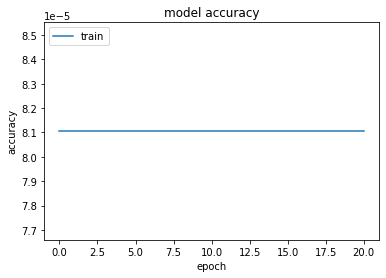

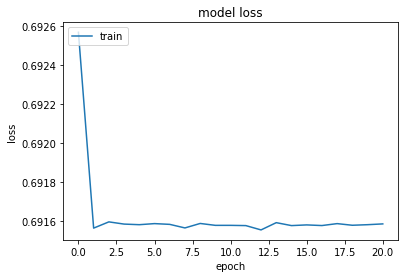

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(result.history.keys())
# summarize history for accuracy
plt.plot(result.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# **CNN**

# **ARIMA**